# CZ3006 Lab 4 - Network Traffic Analysis

### import libraries

In [55]:
import igraph
import matplotlib.pyplot as plt
import pandas as pd

## read data

In [56]:
dataframe = pd.read_csv('data/SFlow_Data_lab4.csv')
dataframe.head()

,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,...,6,0x00,50,51216,23505,0x10,1518,1500,2048,Unnamed: 20
0,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,...,6,0x00,56,23159.0,80,0x10,74,52,2048,NaN
1,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,...,6,0x00,50,50041.0,20739,0x10,1518,1500,2048,NaN
2,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,...,17,0x00,120,54241.0,26510,0x10,116,94,2048,NaN
3,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,...,6,0x00,56,53923.0,34262,0x10,70,52,2048,NaN
4,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,...,17,0x00,120,55069.0,26509,0x10,113,91,2048,NaN


## add own column names (since column names not given)

In [57]:
dataframe.columns = [
    'type',
    'sflow_agent_ip',
    'input_port',
    'output_port',
    'source_mac',
    'destination_mac',
    'ethernet_type',
    'in_vlan',
    'out_vlan',
    'source_ip',
    'destination_ip',
    'ip_protocol',
    'ip_type_of_service',
    'ip_ttime_to_live',
    'source_port',
    'destination_port',
    'tcp_flags',
    'packet_size',
    'ip_size',
    'sampling_rate',
    '_',
]
print(dataframe.columns)

Index(['type', 'sflow_agent_ip', 'input_port', 'output_port', 'source_mac',
       'destination_mac', 'ethernet_type', 'in_vlan', 'out_vlan', 'source_ip',
       'destination_ip', 'ip_protocol', 'ip_type_of_service',
       'ip_ttime_to_live', 'source_port', 'destination_port', 'tcp_flags',
       'packet_size', 'ip_size', 'sampling_rate', '_'],
      dtype='object')


In [58]:
dataframe.head()

,type,sflow_agent_ip,input_port,output_port,source_mac,destination_mac,ethernet_type,in_vlan,out_vlan,source_ip,...,ip_protocol,ip_type_of_service,ip_ttime_to_live,source_port,destination_port,tcp_flags,packet_size,ip_size,sampling_rate,_
0,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,...,6,0x00,56,23159.0,80,0x10,74,52,2048,NaN
1,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,...,6,0x00,50,50041.0,20739,0x10,1518,1500,2048,NaN
2,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,...,17,0x00,120,54241.0,26510,0x10,116,94,2048,NaN
3,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,...,6,0x00,56,53923.0,34262,0x10,70,52,2048,NaN
4,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,...,17,0x00,120,55069.0,26509,0x10,113,91,2048,NaN


## drop last column (empty column)

In [59]:
dataframe = dataframe.drop('_', axis=1)
dataframe.head()

,type,sflow_agent_ip,input_port,output_port,source_mac,destination_mac,ethernet_type,in_vlan,out_vlan,source_ip,destination_ip,ip_protocol,ip_type_of_service,ip_ttime_to_live,source_port,destination_port,tcp_flags,packet_size,ip_size,sampling_rate
0,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048
1,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048
2,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048
3,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048
4,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.255.221.151,17,0x00,120,55069.0,26509,0x10,113,91,2048


## check for NaNs

In [60]:
dataframe_has_nan = False
for column in dataframe.columns:
    if dataframe[column].isna().values.any():
        print(f'{column} has NaN values')
        dataframe_has_nan = True

if dataframe_has_nan:
    print('dataframe has NaN values')
else:
    print('dataframe does not have NaN values')

dataframe does not have NaN values


#### no NaNs! nice

### check for IP addresses that are not in dotted-decimal notation

- there are "abnormal IP addresses" in the practice data; it could be the same here

In [61]:
for row in dataframe.itertuples():
    if len(row.source_ip.split('.')) != 4 or len(row.destination_ip.split('.')) != 4:
        print('_abnormal packet_')
        print('source IP:', row.source_ip, 'destination IP:', row.destination_ip)
        print('source MAC:', row.source_mac, 'destination MAC:', row.destination_mac)
        print('IP packet size:', row.ip_size, '\n')

1
IP packet size: 0 

_abnormal packet_
source IP: 1026937 destination IP: 0
source MAC: 10000000000 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 349680 destination IP: 39761
source MAC: 10000000000 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 0 destination IP: 0
source MAC: 10000000000 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 113899 destination IP: 5494
source MAC: 10000000000 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 12632328 destination IP: 6419115
source MAC: 10000000000 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 26210250 destination IP: 1858810
source MAC: 1E+11 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 3073512 destination IP: 21690
source MAC: 1E+11 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source IP: 2705573 destination IP: 827043
source MAC: 1000000000 destination MAC: 1
IP packet size: 0 

_abnormal packet_
source 

#### observations

- most are in base-10 decimal notation - can be converted to dotted-decimal
  - [reference](https://itstillworks.com/convert-ip-addresses-decimal-format-7611714.html)
  - [how to convert to dotted decimal](https://consciousvibes.com/wp/tech/networking/ip-address-conversion/)
  - [example conversion](https://consciousvibes.com/wp/wp-content/uploads/2018/09/ConvertingToBase256FromDecimal.pdf)
- a few IPv6 addresses (e.g. '2402:8f00:0000:0048:0000:0000:0000:0006') - leave them be
- there are some invalid IP addresses (e.g. '-') - leave them be / convert to NaN

### define a function that converts base-10 decimal to dotted-decimal

In [62]:
def convert_base_10_to_dotted(decimal_ip: int):
    ip_as_list = ['0', '0', '0', '0']

    for index in range(3, -1, -1):
        if decimal_ip < 256:
            ip_as_list[index] = str(decimal_ip)
            break
        
        quotient = decimal_ip // 256
        ip_as_list[index] = str(decimal_ip - quotient * 256)
        
        decimal_ip = quotient

    return '.'.join(ip_as_list)

### deal with abnormal IP addresses

In [63]:
for row_index, row in dataframe.iterrows():
    if len(row.source_ip.split('.')) == 4 and len(row.destination_ip.split('.')) == 4:
        continue  # valid dotted-decimal IPv4 address

    if len(row.source_ip.split(':')) == 8 and len(row.destination_ip.split(':')) == 8:
        continue  # valid IPv6 address

    source_ip = row.source_ip
    destination_ip = row.destination_ip

    if len(source_ip.split('.')) != 4:
        new_source_ip = source_ip

        try:
            new_source_ip = convert_base_10_to_dotted(int(source_ip))
        except:
            pass

        dataframe.at[row_index, 'source_ip'] = new_source_ip

    if len(destination_ip.split('.')) != 4:
        new_destination_ip = destination_ip

        try:
            new_destination_ip = convert_base_10_to_dotted(int(destination_ip))
        except:
            pass

        dataframe.at[row_index, 'destination_ip'] = new_destination_ip

    print(
        'decimal source IP:', source_ip, '->', 
        'dotted-decimal source IP:', new_source_ip, '\n',
        'destination IP:', destination_ip, '->', 
        'dotted-decimal destination IP:', new_destination_ip, '\n',
    )

dotted-decimal destination IP: 0.0.0.0 

decimal source IP: 217026 -> dotted-decimal source IP: 0.3.79.194 
 destination IP: 28 -> dotted-decimal destination IP: 0.0.0.28 

decimal source IP: 0 -> dotted-decimal source IP: 0.0.0.0 
 destination IP: 0 -> dotted-decimal destination IP: 0.0.0.0 

decimal source IP: 50968 -> dotted-decimal source IP: 0.0.199.24 
 destination IP: 2 -> dotted-decimal destination IP: 0.0.0.2 

decimal source IP: 20456354 -> dotted-decimal source IP: 1.56.35.162 
 destination IP: 1 -> dotted-decimal destination IP: 0.0.0.1 

decimal source IP: 2714178 -> dotted-decimal source IP: 0.41.106.66 
 destination IP: 6725718 -> dotted-decimal destination IP: 0.102.160.86 

decimal source IP: 23236048 -> dotted-decimal source IP: 1.98.141.208 
 destination IP: 42834 -> dotted-decimal destination IP: 0.0.167.82 

decimal source IP: - -> dotted-decimal source IP: - 
 destination IP: - -> dotted-decimal destination IP: - 

decimal source IP: 179828934 -> dotted-decimal so

### check IP addresses again to make sure changes were made

In [64]:
for row in dataframe.itertuples():
    if len(row.source_ip.split('.')) == 4 and len(row.destination_ip.split('.')) == 4:
        continue  # valid dotted-decimal IPv4 address

    if len(row.source_ip.split(':')) == 8 and len(row.destination_ip.split(':')) == 8:
        continue  # valid IPv6 address

    print('_abnormal packet_')
    print('source IP:', row.source_ip, 'destination IP:', row.destination_ip)
    print('source MAC:', row.source_mac, 'destination MAC:', row.destination_mac)
    print('IP packet size:', row.ip_size, '\n')

_abnormal packet_
source IP: - destination IP: -
source MAC: 70e42269fb68 destination MAC: 09002b000005
IP packet size: 75 



#### only 1 packet with missing source and destination IP addresses; good enough

## 4A - Top 5 talkers

In [65]:
print('IP address       number of packets sent')
print(dataframe.source_ip.value_counts().nlargest(5))

IP address       number of packets sent
193.62.192.8     3041
155.69.160.32    2975
130.14.250.11    2604
14.139.196.58    2452
140.112.8.139    2056
Name: source_ip, dtype: int64


### top 5 talker organisations

- 193.62.192.8 - RIPE Network Coordination Centre (RIPE)
- 155.69.160.32- Asia Pacific Network Information Centre (APNIC)
- 130.14.250.11 - National Library of Medicine (NLM)
- 14.139.196.58 - Asia Pacific Network Information Centre (APNIC)
- 140.112.8.139 - Asia Pacific Network Information Centre (APNIC)

[organisation names obtained from whois](https://who.is/)

### visualise number of packets sent by top 20 talkers

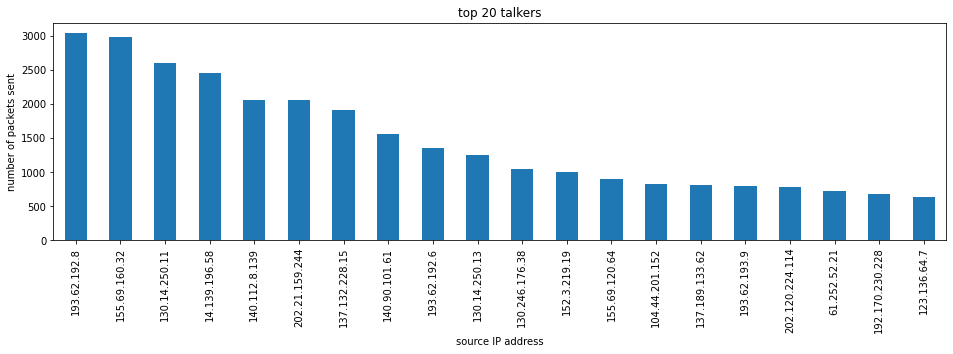

In [66]:
plt.figure(figsize=(16.0, 4.0))

plt.title('top 20 talkers')
plt.xlabel('source IP address')
plt.ylabel('number of packets sent')

dataframe.source_ip.value_counts().nlargest(20).plot(kind='bar')

## 4A - Top 5 listeners

In [67]:
print('IP address       number of packets received')
print(dataframe.destination_ip.value_counts().nlargest(5))

IP address       number of packets received
103.37.198.100     3841
137.132.228.15     3715
202.21.159.244     2446
192.101.107.153    2368
103.21.126.2       2056
Name: destination_ip, dtype: int64


### top 5 listener organisations

- 103.37.198.100 - Asia Pacific Network Information Centre (APNIC)
- 137.132.228.15 - Asia Pacific Network Information Centre (APNIC)
- 202.21.159.244 - Asia Pacific Network Information Centre (APNIC)
- 192.101.107.153 - Pacific Northwest National Laboratory (PNNL-Z)
- 103.21.126.2 - Asia Pacific Network Information Centre (APNIC)

[organisation names obtained from whois](https://who.is/)

### visualise number of packets received by top 20 listeners

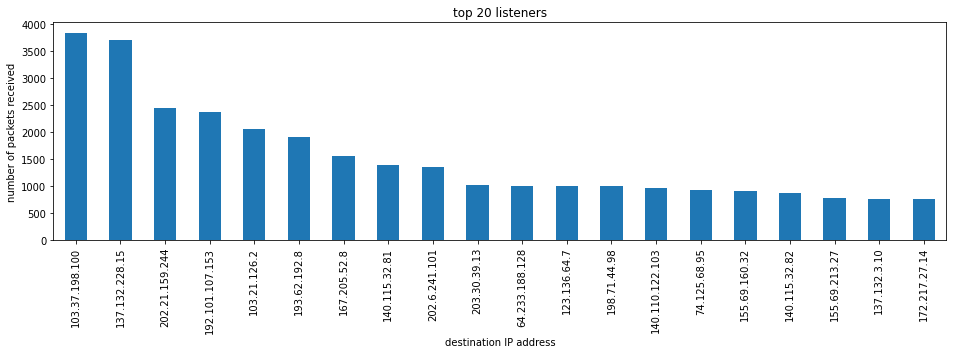

In [68]:
plt.figure(figsize=(16.0, 4.0))

plt.title('top 20 listeners')
plt.xlabel('destination IP address')
plt.ylabel('number of packets received')

dataframe.destination_ip.value_counts().nlargest(20).plot(kind='bar')

## 4B - Transport Protocols

In [69]:
print('IP protocol type | number of packets')
print(dataframe.ip_protocol.value_counts())

IP protocol type | number of packets
6      56063
17      9462
50      1698
0       1261
47       657
41       104
1         74
381       45
58         4
103        1
Name: ip_protocol, dtype: int64


### protocols

- 6 - Transmission Control Protocol (TCP)
- 17 - User Datagram Protocol (UDP)
- 50 - Encapsulating Security Payload (ESP)
- 0 - IPv6 Hop-by-Hop Option (HOPOPT)
- 47 - Generic Routing Encapsulation (GREs)
- 41 - IPv6 Encapsulation (IPv6)
- 1 - Internet Control Message Protocol (ICMP)
- 381 - ?
- 58 - ICMP for IPv6 (IPv6-ICMP)
- 103 - Protocol Independent Multicast (PIM)

[quick reference](https://en.wikipedia.org/wiki/List_of_IP_protocol_numbers)  
[more trustworthy reference](https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xml)

### transport protocols' number of packets

- TCP: 56063
- UDP: 9462

[reference](https://en.wikipedia.org/wiki/Transport_layer#Protocols)

### visualise number of packets vs transport protocols

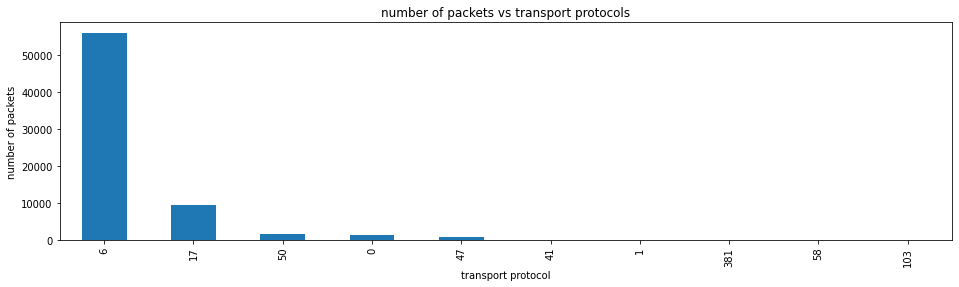

In [70]:
plt.figure(figsize=(16.0, 4.0))

plt.title('number of packets vs transport protocols')
plt.xlabel('transport protocol')
plt.ylabel('number of packets')

dataframe.ip_protocol.value_counts().plot(kind='bar')

## 4C - Applications Protocols

In [71]:
print('destination IP port | number of packets')
print(dataframe.destination_port.value_counts().nlargest(5))

destination IP port | number of packets
443      13423
80        2647
52866     2068
45512     1356
56152     1341
Name: destination_port, dtype: int64


### application service

- 443 - HTTPS
- 80 - HTTP
- 52866 - unknown (dynamic / private port)
- 45512 - unknown (unassigned)
- 56152 - unknown (dynamic / private port)

### visualise number of packets vs destination ports

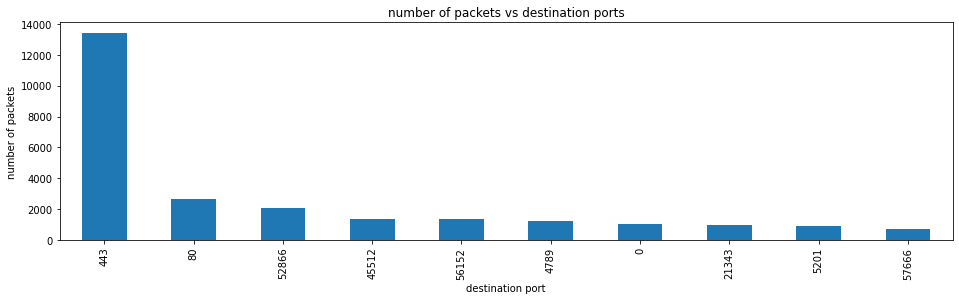

In [72]:
plt.figure(figsize=(16.0, 4.0))

plt.title('number of packets vs destination ports')
plt.xlabel('destination port')
plt.ylabel('number of packets')

dataframe.destination_port.value_counts().nlargest(10).plot(kind='bar')

## 4D - Traffic

In [73]:
# assume sampling rate is 1 in 1000, as given in the instructions
# actual is different based on the dataframe (1 in 2048)
sampling_rate = 0.001

# assume IP packet size is in bytes
# need to convert to mega bytes
print(f'total traffic (MB): {(dataframe.ip_size.sum() / 2**(10*2)) / sampling_rate}')

total traffic (MB): 61775.51460266113


## 4E - Top 5 communication pair

In [74]:
# reference: https://www.reddit.com/r/learnpython/comments/7s99rk/pandas_sort_by_most_frequent_value_combinations/dt2z7fm?utm_source=share&utm_medium=web2x

# unidirectional
print(
    dataframe
        .groupby(['source_ip', 'destination_ip'])
        .size()
        .sort_values(ascending=False)
        .nlargest(10)
)

source_ip       destination_ip 
193.62.192.8    137.132.228.15     3041
130.14.250.11   103.37.198.100     2599
14.139.196.58   192.101.107.153    2368
140.112.8.139   103.21.126.2       2056
137.132.228.15  193.62.192.8       1910
140.90.101.61   167.205.52.8       1561
193.62.192.6    202.6.241.101      1351
130.14.250.13   103.37.198.100     1239
152.3.219.19    198.71.44.98        994
130.246.176.38  140.110.122.103     958
dtype: int64


#### note: the above top communication pairs are unidirectional

- (ip_1 as source and ip_2 as destination) != (ip_2 as source and ip_1 as destination)
- e.g. from 193.62.192.8 to 137.132.228.15 != from 137.132.228.15 to 193.62.192.8

### create a new column where source / destination does not matter

In [75]:
pair_list = []

for ip_1, ip_2 in zip(dataframe.source_ip, dataframe.destination_ip):
    if ip_1 < ip_2:
        pair_list.append(ip_1 + ' - ' + ip_2)
    else:
        pair_list.append(ip_2 + ' - ' + ip_1)

dataframe.ip_pair = pd.Series(pair_list)

dataframe.head()

,type,sflow_agent_ip,input_port,output_port,source_mac,destination_mac,ethernet_type,in_vlan,out_vlan,source_ip,destination_ip,ip_protocol,ip_type_of_service,ip_ttime_to_live,source_port,destination_port,tcp_flags,packet_size,ip_size,sampling_rate
0,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048
1,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048
2,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048
3,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048
4,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.255.221.151,17,0x00,120,55069.0,26509,0x10,113,91,2048


### find top communication pairs (bidirectional)

In [76]:
print('communication pair                 number of packets sent / received')
print(dataframe.ip_pair.value_counts().nlargest(5))

communication pair                 number of packets sent / received
137.132.228.15 - 193.62.192.8      4951
103.37.198.100 - 130.14.250.11     2842
14.139.196.58 - 192.101.107.153    2368
103.21.126.2 - 140.112.8.139       2056
140.90.101.61 - 167.205.52.8       1752
dtype: int64


### Voilà!

### visualise top communication pairs' number of packets sent/received

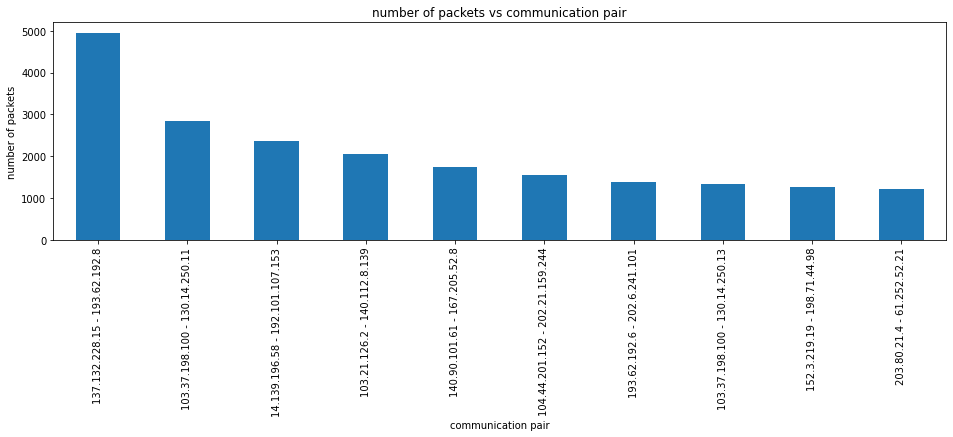

In [77]:
plt.figure(figsize=(16.0, 4.0))

plt.title('number of packets vs communication pair')
plt.xlabel('communication pair')
plt.ylabel('number of packets')

dataframe.ip_pair.value_counts().nlargest(10).plot(kind='bar')

## 4E - Visualising the communication between the different IP hosts

### create a dataframe that records the number of packets sent from source IP address to destination IP address

In [78]:
# reference: https://stackoverflow.com/a/40872584/9171260
grouped_dataframe = dataframe.groupby(['source_ip', 'destination_ip']).size().sort_values(ascending=False).to_frame('packets_sent').reset_index()
grouped_dataframe.head()

,source_ip,destination_ip,packets_sent
0,193.62.192.8,137.132.228.15,3041
1,130.14.250.11,103.37.198.100,2599
2,14.139.196.58,192.101.107.153,2368
3,140.112.8.139,103.21.126.2,2056
4,137.132.228.15,193.62.192.8,1910


### plot graph / network using the dataframe created earlier (top 10% of records)

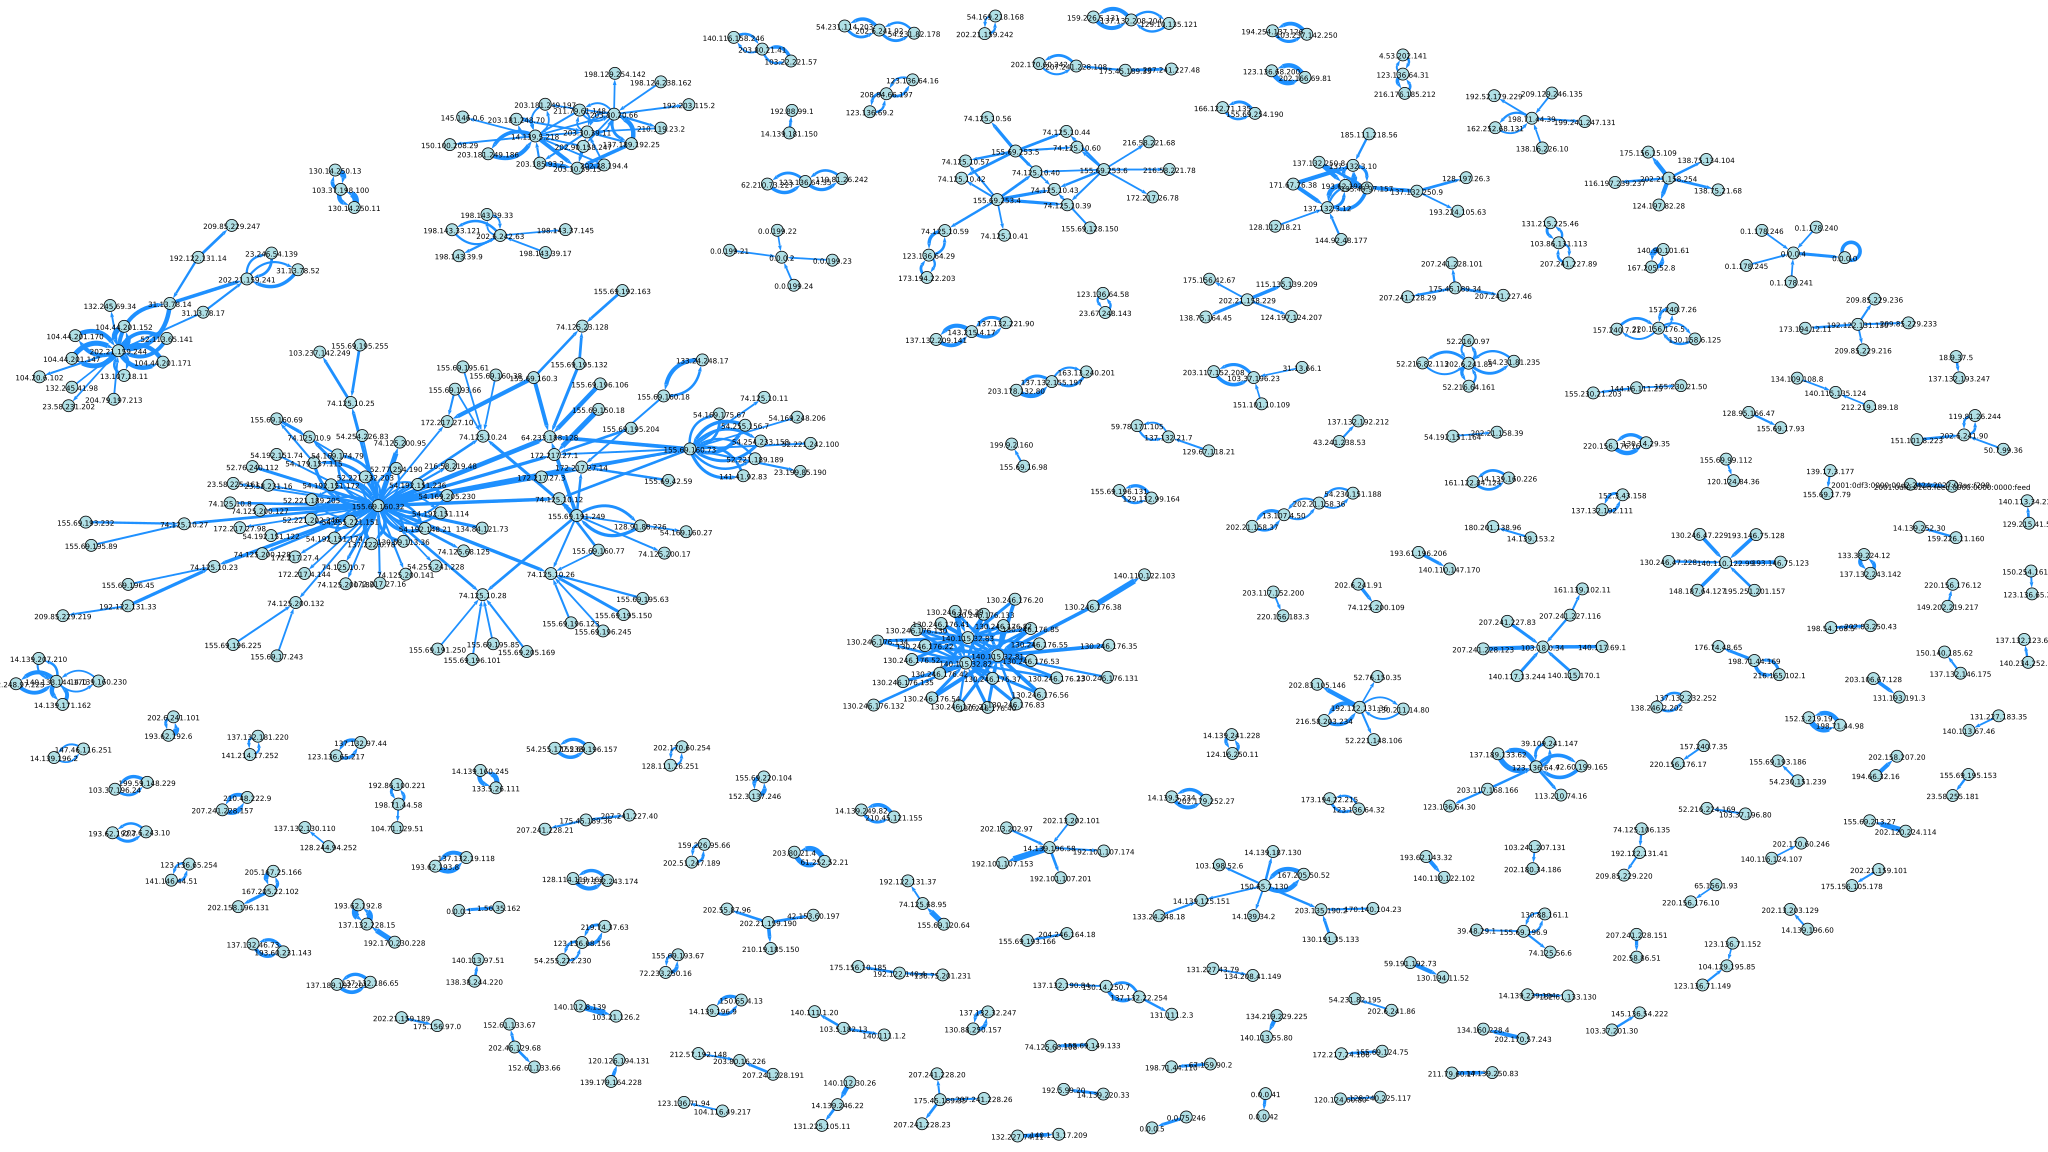

In [91]:
# reference: https://stackoverflow.com/a/51901291/9171260
tuple_list = [
    tuple(row) 
    for row 
    in grouped_dataframe.head(
        n=(len(grouped_dataframe)//10)
    ).to_numpy()
]

computer_network = igraph.Graph.TupleList(
    tuple_list, 
    directed=True, 
    weights=True, 
)

computer_network.vs['size'] = 15
computer_network.vs['label_size'] = 9
computer_network.vs['label'] = computer_network.vs['name']
computer_network.vs['color'] = 'powderblue'

import math

computer_network.es['width'] =  [
    max(math.log(weight), 0.1)
    for weight in computer_network.es['weight']
]
computer_network.es['arrow_size'] = 0.5
computer_network.es['color'] = 'dodgerblue'

layout = computer_network.layout('fr')
igraph.plot(computer_network, layout=layout, bbox=(2560, 1440))

#### some nodes with high degree centrality and their organisation, from left to right (based on visual inspection of graph)

- 202.21.159.244 - APNIC
- 155.69.160.32 - APNIC
- 14.139.5.218 - APNIC
- 155.69.160.73 - APNIC
- 140.115.32.81 - APNIC

- honestly, simply getting the organisation name does not seem to reveal much information (they are mostly APNIC)
- let's see if we can use an API to get more information such as domain name

In [80]:
import ipinfo


access_token = ''
handler = ipinfo.getHandler(access_token)

In [93]:
# test_ip = '152.3.219.19'
from pprint import pprint


test_ips = [
    '202.21.159.244',
    '155.69.160.32',
    '14.139.5.218',
    '155.69.160.73',
    '140.115.32.81',
]

for test_ip in test_ips:
    details = handler.getDetails(test_ip)
    pprint(details.all)
    print()

{'city': 'Singapore',
 'country': 'SG',
 'country_name': 'Singapore',
 'ip': '202.21.159.244',
 'latitude': '1.2897',
 'loc': '1.2897,103.8501',
 'longitude': '103.8501',
 'org': 'AS23728 Republic Polytechnic. Multihoming AS Singapore',
 'postal': '048508',
 'readme': 'https://ipinfo.io/missingauth',
 'region': '',
 'timezone': 'Asia/Singapore'}

{'city': 'Singapore',
 'country': 'SG',
 'country_name': 'Singapore',
 'ip': '155.69.160.32',
 'latitude': '1.3450',
 'loc': '1.3450,103.6813',
 'longitude': '103.6813',
 'org': 'AS9419 Nanyang Technological University',
 'postal': '639798',
 'readme': 'https://ipinfo.io/missingauth',
 'region': '',
 'timezone': 'Asia/Singapore'}

{'city': 'Karol Bāgh',
 'country': 'IN',
 'country_name': 'India',
 'ip': '14.139.5.218',
 'latitude': '28.5984',
 'loc': '28.5984,77.2253',
 'longitude': '77.2253',
 'org': 'AS55824 NKN Core Network',
 'postal': '110003',
 'readme': 'https://ipinfo.io/missingauth',
 'region': 'Delhi',
 'timezone': 'Asia/Kolkata'}

{

#### based on the information obtained, perhaps we can take a closer look at hostname and country